In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d labid93/image-forgery-detection

100% 3.55G/3.57G [00:41<00:00, 99.5MB/s]
100% 3.57G/3.57G [00:41<00:00, 92.7MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/image-forgery-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
dataset=os.listdir('/content/Dataset')
print(dataset)
print(len(dataset))

['Forged', 'Original']
2


In [6]:
forged_folder=os.listdir('/content/Dataset/Forged')
print(forged_folder)
print(len(forged_folder))

['11684.jpg', '9737.tif', '8422.tif', '10635.tif', '7536.tif', '8214.tif', '7182.tif', '10168.png', '10895.tif', '9745.tif', '11674.jpg', '11752.jpg', '12055.jpg', '11953.jpg', '11099.jpg', '8564.png', '10091.png', '11012.jpg', '7213.tif', '11559.jpg', '7977.png', '12578.jpg', '10857.tif', '10588.tif', '11175.jpg', '7962.tif', '7529.tif', '10621.tif', '7391.png', '11212.jpg', '7719.tif', '8514.tif', '11317.jpg', '11661.jpg', '10980.jpg', '11736.jpg', '6804.tif', '7371.tif', '7523.tif', '12480.jpg', '10789.tif', '9789.png', '8764.tif', '9152.png', '6616.tif', '12250.jpg', '8079.tif', '8384.tif', '6987.tif', '9252.tif', '12507.jpg', '11243.jpg', '7430.tif', '8446.tif', '9367.png', '11724.jpg', '11744.jpg', '12399.jpg', '10741.tif', '7938.tif', '8396.tif', '12957.jpg', '11514.jpg', '9336.png', '6865.tif', '6740.tif', '11756.jpg', '12378.jpg', '11195.jpg', '7999.tif', '12609.jpg', '8892.png', '8058.tif', '10512.tif', '10584.tif', '8082.tif', '11741.jpg', '7226.tif', '12890.jpg', '7693.tif'

In [7]:
original_folder=os.listdir('/content/Dataset/Original')
print(original_folder)
print(len(original_folder))

['4909.JPG', '2850.jpg', '2194.jpg', '3934.JPG', '3144.JPG', '248.jpg', '367.jpg', '850.jpg', '5669.JPG', '1645.jpg', '6012.jpg', '2163.jpg', '3035.JPG', '6391.jpg', '4036.jpg', '4419.JPG', '193.jpg', '3218.jpg', '5107.JPG', '4264.JPG', '3486.jpg', '3807.JPG', '4460.jpg', '1378.jpg', '317.jpg', '1012.jpg', '3231.JPG', '412.jpg', '4569.JPG', '2775.jpg', '2719.jpg', '24.jpg', '85.jpg', '6493.jpg', '2351.jpg', '20.jpg', '6347.jpg', '3322.jpg', '5152.JPG', '237.jpg', '4215.jpg', '2198.jpg', '5899.jpg', '4037.jpg', '2299.jpg', '1315.jpg', '1054.jpg', '5160.JPG', '4100.jpg', '2943.jpg', '1849.jpg', '364.jpg', '2203.jpg', '3355.jpg', '3295.jpg', '3474.jpg', '3196.JPG', '4985.JPG', '2381.jpg', '1341.jpg', '5501.JPG', '5785.jpg', '3147.JPG', '4861.JPG', '5242.JPG', '4124.jpg', '68.jpg', '1379.jpg', '1968.jpg', '1874.jpg', '6323.jpg', '6203.jpg', '4743.JPG', '5713.jpg', '484.jpg', '5024.JPG', '4171.jpg', '6296.jpg', '5587.JPG', '4269.JPG', '1808.jpg', '4158.jpg', '5491.JPG', '4348.JPG', '661.jpg

In [8]:
new_data=[]

In [9]:
for i in range(6500):
  img_path='/content/Dataset/Forged/'+forged_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert("RGB")
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  new_data.append([img_arr,1])

In [10]:
for i in range(6500):
  img_path='/content/Dataset/Original/'+original_folder[i]
  img_pillow=Image.open(img_path)
  img_color=img_pillow.convert("RGB")
  img_resize=img_color.resize((64,64))
  img_arr=np.array(img_resize)
  new_data.append([img_arr,0])

In [11]:
x=[]
y=[]
for img,label in new_data:
  x.append(img)
  y.append(label)

In [12]:
x=np.array(x)
y=np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [14]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train_scaled,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
330/330 [==============================] - 9s 9ms/step - loss: 0.6847 - accuracy: 0.5465 - val_loss: 0.6533 - val_accuracy: 0.6145
Epoch 2/20
330/330 [==============================] - 2s 7ms/step - loss: 0.6534 - accuracy: 0.6083 - val_loss: 0.6230 - val_accuracy: 0.6615
Epoch 3/20
330/330 [==============================] - 3s 8ms/step - loss: 0.6211 - accuracy: 0.6582 - val_loss: 0.6036 - val_accuracy: 0.6769
Epoch 4/20
330/330 [==============================] - 2s 7ms/step - loss: 0.5990 - accuracy: 0.6859 - val_loss: 0.5671 - val_accuracy: 0.7017
Epoch 5/20
330/330 [==============================] - 2s 7ms/step - loss: 0.5639 - accuracy: 0.7180 - val_loss: 0.5463 - val_accuracy: 0.7137
Epoch 6/20
330/330 [==============================] - 2s 7ms/step - loss: 0.5250 - accuracy: 0.7491 - val_loss: 0.5246 - val_accuracy: 0.7393
Epoch 7/20
330/330 [==============================] - 2s 7ms/step - loss: 0.4809 - accuracy: 0.7747 - val_loss: 0.5399 - val_accuracy: 0.7350
Epoch 

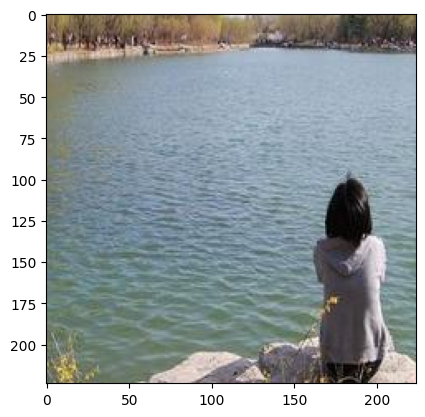

In [19]:
img_path='/content/Dataset/Original/1004.jpg'
img_pillow=Image.open(img_path)
img_arr=np.array(img_pillow)
plt.imshow(img_arr)

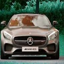

1/1 [==============================] - 0s 20ms/step
[[1.0000000e+00 2.3725812e-09]]
The image is ORIGINAL Image


In [24]:
img_path='/content/car.jpeg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert("RGB")
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
cv2_imshow(img_arr)
img_scaled=img_arr/255
img_reshaped=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshaped)
print(prediction)
output=np.argmax(prediction)
if(output==0):
  print('The image is ORIGINAL Image')
else:
  print('The image is FORGERY Image')